In [2]:
import cv2

from deepface import DeepFace
from deepface.detectors import FaceDetector
from deepface.DeepFace import build_model
from deepface.commons import functions

from tensorflow import keras
from skimage import io
import os
import matplotlib.pyplot as plt

#os.listdir('../data/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/1_HQ/frames/')

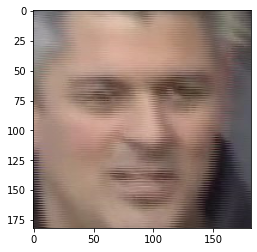

In [3]:
# DETECTING FACE
img_path = '../data/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/1_HQ/frames/00505.jpg'
detector_name = "opencv"

img = io.imread(img_path) 
detector = FaceDetector.build_model("opencv")
obj = FaceDetector.detect_faces(detector, detector_name, img)
face = obj[2][0]
plt.imshow(face)
plt.show()


## Using code of Represent

In [147]:
embedding = DeepFace.represent(img_path = face, model_name = 'Facenet')
len(embedding)

128

In [6]:
model_name = 'Facenet' #'VGG-Face'
#model = None
enforce_detection = True
detector_backend = 'opencv'
align = True
normalization = 'base'


In [121]:
model = build_model(model_name)

#decide input shape
input_shape_x, input_shape_y = functions.find_input_shape(model)

#detect and align
img = functions.preprocess_face(img = face,
                                target_size=(input_shape_y, input_shape_x),
                                enforce_detection = enforce_detection,
                                detector_backend = detector_backend,
                                align = align)

#custom normalization
img = functions.normalize_input(img = img, normalization = normalization)


In [122]:
#represent
embedding1 = model.predict(img)

embedding2 = model.predict(img)[0]#.tolist()

print(embedding1.shape)
print(embedding2.shape)

(1, 128)
(128,)


## Using code of Analyze

In [4]:
#img_paths, bulkProcess = functions.initialize_input(face)
model = build_model('Emotion')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d (AverageP  (None, 7, 7, 64)         0         
 ooling2D)                                                       
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 128)         7

In [7]:
#emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
img, region = functions.preprocess_face(img = face, target_size = (48, 48), grayscale = True, enforce_detection = enforce_detection, detector_backend = detector_backend, return_region = True)

#emotion_predictions = model.predict(img)[0,:]
#sum_of_predictions = emotion_predictions.sum()

extractor = keras.Model(inputs=model.inputs,
                        outputs=[layer.output for layer in model.layers])
features = extractor(img)



In [8]:
features[8].shape #flatten

TensorShape([1, 128])

In [20]:
features[8].numpy()[0]


array([0.        , 0.34232548, 0.        , 0.        , 0.        ,
       0.167624  , 0.30828834, 0.12178145, 0.3427984 , 0.        ,
       0.        , 0.        , 0.        , 0.20505388, 0.02746622,
       0.04786101, 0.01937225, 0.12067136, 0.        , 0.        ,
       0.0345666 , 0.        , 0.08719864, 0.        , 0.        ,
       0.        , 0.        , 0.01229115, 0.        , 0.        ,
       0.11292411, 0.        , 0.04853972, 0.01271209, 0.        ,
       0.25586224, 0.        , 0.09096006, 0.10758902, 0.        ,
       0.        , 0.        , 0.0179206 , 0.11185814, 0.        ,
       0.        , 0.        , 0.02720028, 0.        , 0.        ,
       0.04972349, 0.        , 0.        , 0.02183876, 0.1076702 ,
       0.        , 0.09113713, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13510793, 0.        , 0.06943295,
       0.02537992, 0.        , 0.        , 0.        , 0.        ,
       0.17261219, 0.1134257 , 0.        , 0.        , 0.     

In [174]:
#layer_name = 'my_layer'
#intermediate_layer_model = keras.Model(inputs=model.input,
#                                       outputs=model.layers[8].output)
#intermediate_output = intermediate_layer_model(img)
#intermediate_output

"\nlayer_name = 'my_layer'\nintermediate_layer_model = keras.Model(inputs=model.input,\n                                       outputs=model.layers[8].output)\nintermediate_output = intermediate_layer_model(img)\nintermediate_output\n"